**In this notebook we will be performing Polynomial regression along with comparing it with Linear regression. We will also try to understand the case of under-fitting and over-fitting.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
import operator

# Generating the data

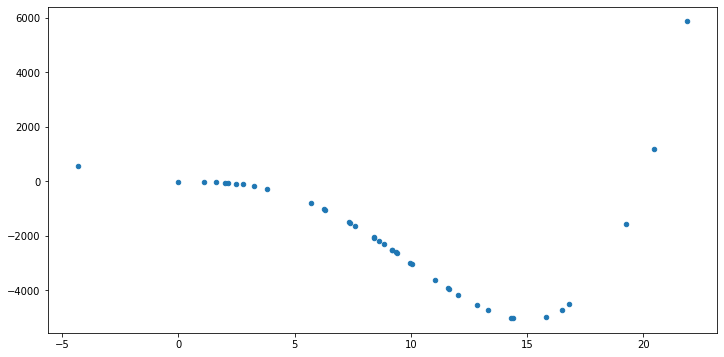

In [2]:
np.random.seed(10)
x = 10 - 6 * np.random.normal(0, 1, 40)
y = x - 6 * (x ** 3) + 0.3* (x ** 4) + np.random.normal(-6, 6, 40)

plt.figure(figsize=(12,6))
plt.scatter(x,y, s=20)
plt.show()

# Helper Functions

In [3]:
def Poly_regression(degree,x,y):
    
    '''
    Parameters:    
    degree: required degree of polynomial
    x : independent variable
    y: dependent variable
    
    
    Function:    
    This function first transforms the x variable into polynomial features of the given degree and then performs linear
    regression by fitting the model with the calculated polynomial features of x. This is called Polynomial regression.
    It is a special case of Linear regression.
    
    
    Returns:    
    The predicted value of y.
    '''
    
    # creating an object of PolynomialFeatures of degree 2
    poly= PolynomialFeatures(degree=degree)
    # transforming the data into polynomial features
    x_poly = poly.fit_transform(x.reshape(-1, 1))

    # Linear Regression
    lin_reg= LinearRegression()
    lin_reg.fit(x_poly, y)
    y_poly_pred = lin_reg.predict(x_poly)
    
    return y_poly_pred


def performance_measure(y,y_pred):
    
    '''
    Parameters:
    y: dependent variable (Actual data)
    y_pred: predicted value of y (Predicted data)
    
    
    Function:
    This function calculates and prints the rmse score and the r2_score of a model.
    
    Returns:
    None  
    '''
    rmse=np.sqrt(mean_squared_error(y,y_pred))
    print('RMSE=',rmse)

    r2=r2_score(y,y_pred)
    print('r2 score=',r2)
    
    return None

def plot_reg(x,y,y_pred,color):
    
    '''
    Parameters:
    x: independent variable (Actual data)
    y: dependent variable (Actual data)
    y_pred: predicted value of y (Predicted data)
    color: Matplotlib color code. for e.g. b: blue ,g: green,r: red,c: cyan,m: magenta,y: yellow,k: black,w: white
    
    Function:
    This function plots the original data along with predicted data to help make comparison and evaluating the model visually.
    
    Returns:
    None  
    '''
    
    plt.figure(figsize=(12,6))
    plt.scatter(x, y, s=10, label='Actual')
    #sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_pred), key=sort_axis)
    x, y_pred = zip(*sorted_zip)
    plt.plot(x, y_pred, color=color,label='Predicted')
    plt.xlabel('x',fontsize=20)
    plt.ylabel('y',fontsize=20)
    plt.legend()
    plt.show()
    
    return None


# Linear Regression

In [4]:
# creating an object of LinearRegression class
lin_reg=LinearRegression()
# fitting the model with data
lin_reg.fit(x.reshape(-1,1),y)
# Predicting the y values using the model
y_pred=lin_reg.predict(x.reshape(-1,1))

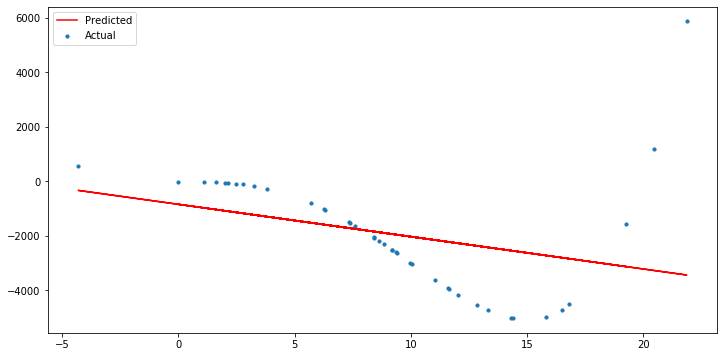

In [5]:
plt.figure(figsize=(12,6))
plt.scatter(x, y,label='Actual' ,s=10)
plt.plot(x, y_pred,label='Predicted', c='r')
plt.legend()
plt.show()

**Computing the RMSE and R²-score of the linear line gives:**

In [6]:
performance_measure(y,y_pred)

RMSE= 2056.8612339607157
r2 score= 0.09978364752510882


**We can observe that the Linear Regression model is not able to capture the relationship between the data which is obvious given that our data in non-linear in nature.**

**This is a case of *under-fitting* where the model isn't able to grasp the nature of the relationship in the data.**


**To overcome under-fitting, we need to increase the complexity of the model. To generate a higher order equation we can add powers of the original features as new features. This is where Polynomial Features comes in.**

# Polynomial Regression

# Degree=2

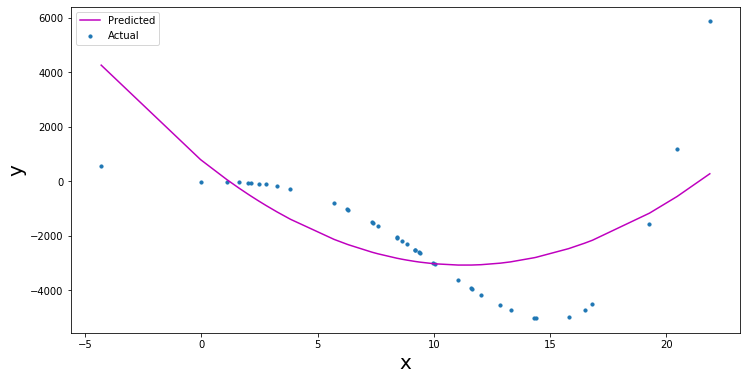

In [7]:
y_poly_pred_2=Poly_regression(2,x,y)
plot_reg(x,y,y_poly_pred_2,'m')

In [8]:
performance_measure(y,y_poly_pred_2)

RMSE= 1576.9654840434791
r2 score= 0.4708469701721202


**We can see that RMSE has decreased and R²-score has increased as compared to the linear line. This suggests that this model is better than the previous model**

**Still the model fails to capture the relationship of the data, thus this is also the case of *under-fitting*.**

# Degree=3

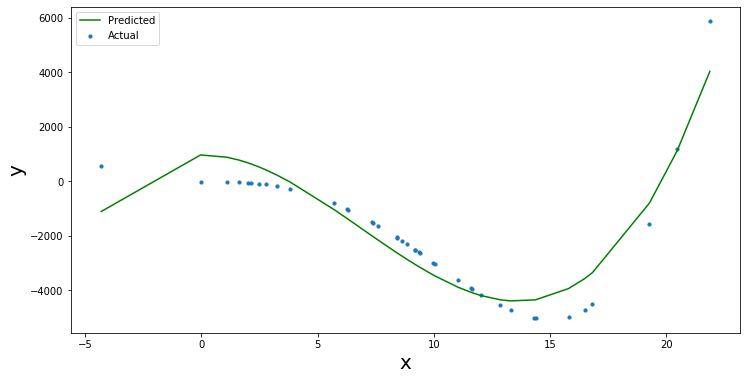

In [9]:
y_poly_pred_3=Poly_regression(3,x,y)
plot_reg(x,y,y_poly_pred_3,'g')

In [10]:
performance_measure(y,y_poly_pred_3)

RMSE= 703.7998606357638
r2 score= 0.8946012974924218


**We can see that RMSE has decreased further and the R²-score has increased more as compared to the polynomial regression model of degree two, suggesting that this model is better than the previous one.**

**It is evident from the curve above that the model captures the relationship between the independent and dependent variable fairly well. It is a good fit but let's explore a bit more.**

# Degree=4

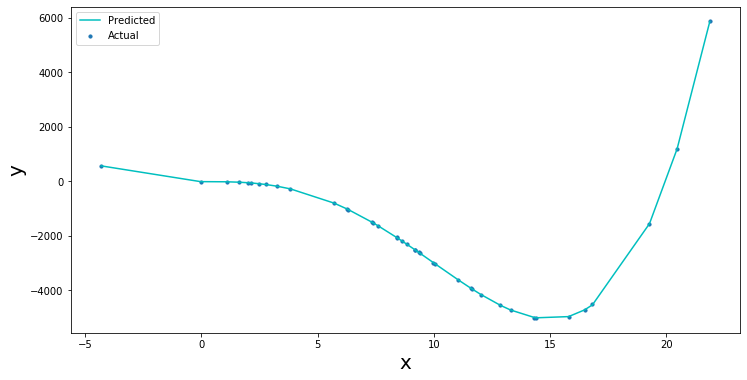

In [11]:
y_poly_pred_4=Poly_regression(4,x,y)
plot_reg(x,y,y_poly_pred_4,'c')

In [12]:
performance_measure(y,y_poly_pred_4)

RMSE= 4.8072051168323116
r2 score= 0.9999950827508023


**We can observe that in this case the RMSE and R²-score are very ideal, hinting that this model is better than all the models so far. But is it really?**

**We can see that the line of fit passes through each point in the data, it indicates that the model is also capturing the noise in the data. This is an example of *over-fitting*.Even though this model passes through most of the data, it will fail to generalize on unseen data.**

# Degree=10

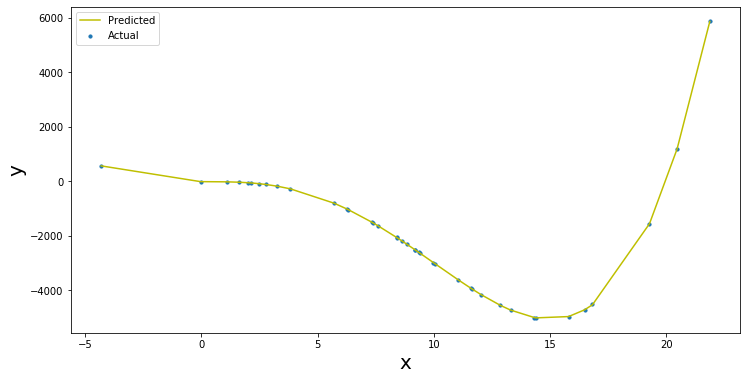

In [13]:
y_poly_pred_10=Poly_regression(10,x,y)
plot_reg(x,y,y_poly_pred_10,'y')

In [14]:
performance_measure(y,y_poly_pred_10)

RMSE= 4.480343449086959
r2 score= 0.9999957287054118


**In this case even after increasing the Degree by a lot, the performance measure of the model still remains the same. This means that increasing the degree doesn't make the model perform better. The model still overfits.**

**Thus the best fit model is the Polynomial Regression model with degree=3.**

Let's summarize!

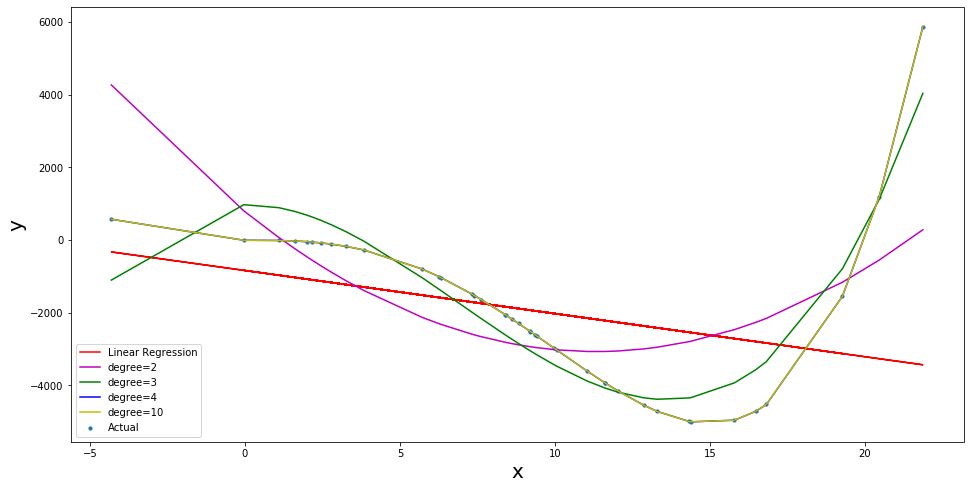

In [15]:
plt.figure(figsize=(16,8))
plt.scatter(x, y,label='Actual' ,s=10)
plt.plot(x, y_pred,label='Linear Regression', c='r')

inds = x.ravel().argsort()   
x = x.ravel()[inds].reshape(-1,1)
y_poly_pred_2 = y_poly_pred_2[inds]
plt.plot(x,y_poly_pred_2,label='degree=2', c='m')
y_poly_pred_3 = y_poly_pred_3[inds]
plt.plot(x,y_poly_pred_3,label='degree=3', c='g')
y_poly_pred_4 = y_poly_pred_4[inds]
plt.plot(x,y_poly_pred_4,label='degree=4', c='b')
y_poly_pred_10 = y_poly_pred_10[inds]
plt.plot(x,y_poly_pred_10,label='degree=10', c='y')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)

plt.legend()
plt.show()


# Practice time!

**The data is given to you below. First perform Linear regression on it and then perform Polynomial Regression with varying degrees to see the difference and find the best fit. Make use of the helper functions provided above.**

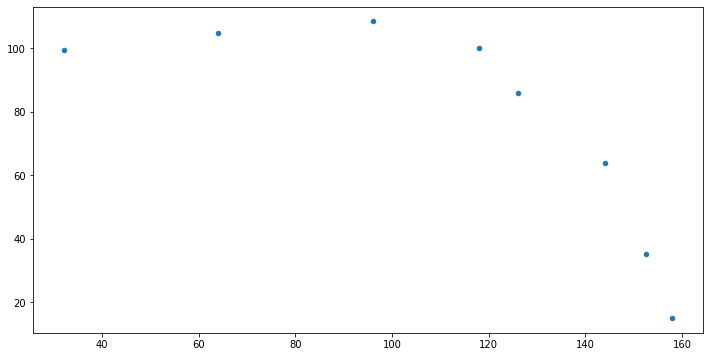

In [16]:
x1 =[32,64,96,118,126,144,152.5,158]     # independent variable
y1 =[99.5,104.8,108.5,100,86,64,35.3,15] # dependent variable

plt.figure(figsize=(12,6))
plt.scatter(x1,y1,s=20)
plt.show()

# Linear Regression

**Note: Remember that the data this time is different. It is in form of a list rather than array. So, the code will be a little different to transform 'x1' to make it fit the model.**

# Polynomial Regression